# Box-Counting Dimension of Metal Nanoparticles

This notebook contains the analysis of the box-counting dimensions, $D_B$, computed for metal nanoparticles in attempt to explore the correlation between $D_B$ and the catalytic activity of the metal nanoparticles.

The results are computed using [Sphractal](https://github.com/jon-ting/sphractal), a Python package for the estimation of the fractal dimension of the surfaces of atomistic objects via box-counting approaches.

## Outline

[Notebook Setups](#setup)

[Correlation Investigation](#corr)

[Case Study: Palladium Nanoparticles](#case-study)

<a id='setup'></a>
## Notebook Setups

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings

# Print package versions for reproducibility
print('Versions of imported libraries:')
print(f"  matplotlib: {mpl.__version__}")
print(f"  numpy: {np.__version__}")
print(f"  pandas: {pd.__version__}")
print(f"  seaborn: {sns.__version__}")

Versions of imported libraries:
  matplotlib: 3.7.2
  numpy: 1.24.4
  pandas: 2.0.3
  seaborn: 0.12.2


Below are some general settings for plotting figures:

In [13]:
sns.set_theme(context='paper', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, color_codes=True, rc=None)  # Options are: {paper, notebook, talk, poster}
figSize, dpi, fontSize, labelSize = (3.5, 2.5), None, 'medium', 'small'
legendSize, lineWidth, markerSize = 'x-small', 1, 3
# SMALL_SIZE, MEDIUM_SIZE, LARGE_SIZE, TITLE_SIZE = 8, 10, 12, 14
# plt.rc('font', size=LARGE_SIZE)  # controls default text sizes
# plt.rc('axes', titlesize=TITLE_SIZE)  # fontsize of the axes title
# plt.rc('axes', labelsize=LARGE_SIZE)  # fontsize of the x and y labels
# plt.rc('xtick', labelsize=LARGE_SIZE)  # fontsize of the tick labels
# plt.rc('ytick', labelsize=LARGE_SIZE)  # fontsize of the tick labels
# plt.rc('legend', fontsize=LARGE_SIZE)  # legend fontsize
# plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

Some handy general functions:

In [3]:
def readPickle(picklePath):
    with open(picklePath, 'rb') as f: 
        df = pickle.load(f)
    # df['numAtoms'] = df.apply(lambda f: numAtomsDict[f['shape']], axis=1)
    df['rangeLenVX'] = df.apply(lambda f: f['maxLenVX'] - f['minLenVX'], axis=1)
    df['rangeLenEX'] = df.apply(lambda f: f['maxLenEX'] - f['minLenEX'], axis=1)
    return df

And some handy global variables:

<a id='corr'></a>
## Correlation investigation

Here we investigate the potential connection between the known catalytic activity of nanoparticles covered by certain surface facets, and their fractal dimensions as estimated by their box-counting dimensions $D_B$, which quantify the roughness of their atomistic surfaces.

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    g = sns.FacetGrid(VXDF, col='shape', col_wrap=4, sharex=True, sharey=True, height=3, aspect=1.1)
    g.map_dataframe(sns.barplot, x='numPoints', y='rangeLenVX', hue='minSample', palette='tab10')
    g.set(ylim=(0.5, None))
    g.set_axis_labels('', '')
    g.figure.text(-0.01, 0.5, r'Domain range ($\AA$)', va='center', rotation='vertical')
    g.figure.text(0.311, 0.0, 'Number of points on a sphere', va='center')
    g.set_titles(col_template='{col_name}')
    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.add_legend(title='Minimum number of box count sample', loc='lower center', bbox_to_anchor=(0.383, -0.12), ncol=5)
    g.tight_layout()
    g.savefig("figures/paramTuneVXDomainBarPlot.png")

NameError: name 'VXDF' is not defined

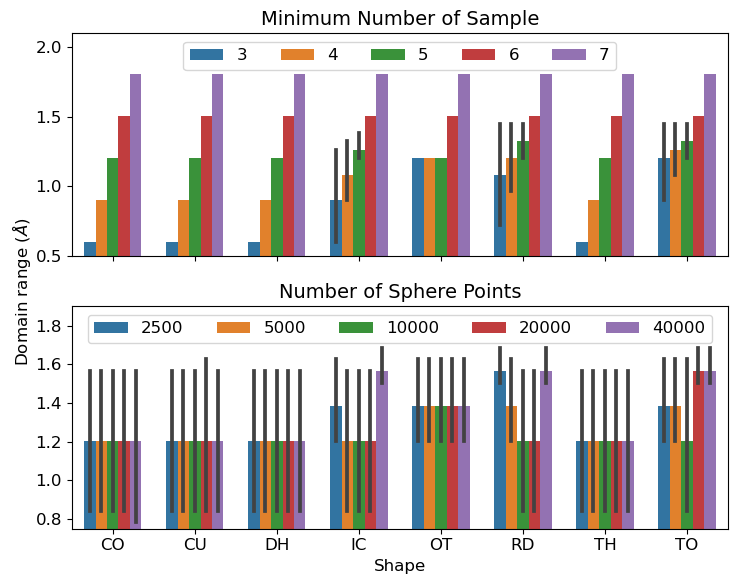

In [245]:
fig, axes = plt.subplots(2, 1, figsize=(7.5, 6), sharex=True, dpi=dpi)
sns.barplot(data=VXDF, x='shape', y='rangeLenVX', hue='minSample', width=0.7, ax=axes[0])
axes[0].set_ylim(bottom=0.5, top=2.1)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Minimum Number of Sample')
axes[0].legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
sns.barplot(data=VXDF, x='shape', y='rangeLenVX', hue='numPoints', width=0.7, ax=axes[1])
axes[1].set_ylim(bottom=0.75, top=1.9)
axes[1].set_xlabel('Shape')
axes[1].set_ylabel('')
axes[1].set_title('Number of Sphere Points')
axes[1].legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
fig.text(-0.01, 0.5, r'Domain range ($\AA$)', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('figures/paramTuneVXDomainBarPlotAgg.png')

The domain range is directly proportional to the minimum number of box count samples. For nanoparticle with certain shapes (`IC`, `RD`, `TO`), generating more points around each sphere sometimes extends the domain range, and returns higher ${D_B}_V$.

### Data Set

We use a set of atomic coordinates of simulated palladium nanoparticles generated for a study on studying the impact of polydispersivity on the properties of palladium nanoparticle electrocatalyst ensembles for parameter tuning here. While the whole data set is currently hosted by [CSIRO Data Access Portal](https://data.csiro.au/collection/csiro:40618), this particularly small set consisting of perfectly shaped nanoparticles (non-energy minimised) was not included in the published data set. They are included in this repository under the `testCases` directory.

The set consists of nanoparticles with 8 different shapes:
- cuboctahedron (CO) -- 826 atoms
- cube (CU) -- 1026 atoms
- decahedron (DH) -- 686 atoms
- icosahedron (IC) -- 923 atoms
- rhombic dodecahedron (RD) -- 670 atoms
- octahedron (OT) -- 1163 atoms
- tetrahedron (TH) -- 875 atoms
- truncated octahedron (TO) -- 807 atoms

In [168]:
bufferDF = readPickle('outputsParamTune/EX/paramTuneBuffer.pickle')
cols = ['shape', 'DBoxEX', 'rangeLenEX', 'bufferDist', 'duration', ]  # 'lowCIEX', 'upCIEX', 'minLenEX', 'maxLenEX'
bufferDF = bufferDF[cols]
bufferDF.head(3)

,shape,DBoxEX,rangeLenEX,bufferDist,duration
CO_5.0_buffer,CO,2.318761,0.280827,5.0,3.936779
CO_6.0_buffer,CO,2.320481,0.263241,6.0,3.914080
CO_7.0_buffer,CO,2.326735,0.264818,7.0,3.742437


#### Duration

Here we look at the impact of the difference in `bufferDist` on the duration of execution.

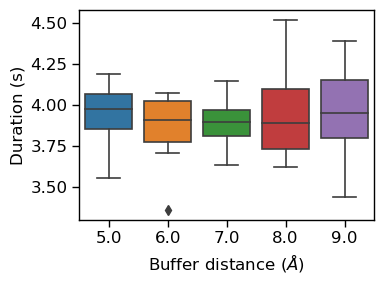

In [169]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.boxplot(data=bufferDF, x='bufferDist', y='duration', ax=ax)
plt.xlabel(r'Buffer distance ($\AA$)')
plt.ylabel('Duration (s)')
plt.tight_layout()
plt.savefig('figures/paramTuneEXBufferDurationBoxPlot.png')

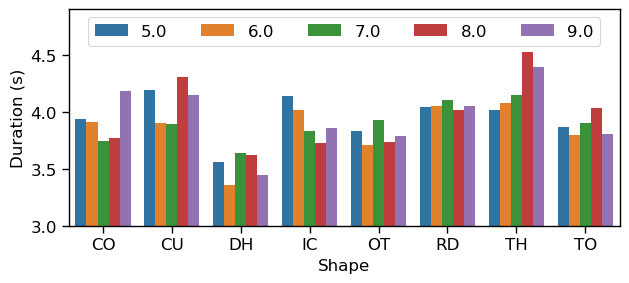

In [170]:
fig, ax = plt.subplots(figsize=(6.5, 3), dpi=dpi)
g = sns.barplot(data=bufferDF, x='shape', y='duration', hue='bufferDist', ax=ax)
plt.ylim(bottom=3, top=4.9)
plt.xlabel('Shape')
plt.ylabel('Duration (s)')
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
plt.tight_layout()
plt.savefig('figures/paramTuneEXBufferDurationBarPlot.png')

No obvious trend was observed. All fluctations in execution duration are within about 0.5 seconds. The offset does not seem to exert a significant impact on the execution duration.

#### Domain Range

Here we look at the impact of the difference in `bufferDist` on the domain range.

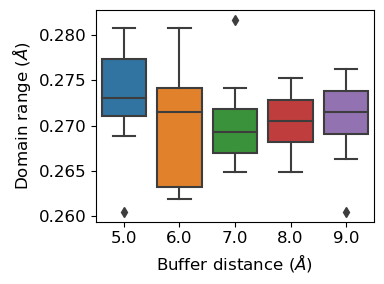

In [279]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.boxplot(data=bufferDF, x='bufferDist', y='rangeLenEX', ax=ax)
plt.xlabel(r'Buffer distance ($\AA$)')
plt.ylabel(r'Domain range ($\AA$)')
plt.tight_layout()
plt.savefig('figures/paramTuneEXBufferDomainBoxPlot.png')

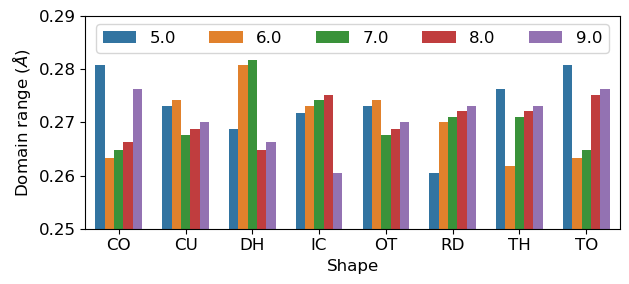

In [278]:
fig, ax = plt.subplots(figsize=(6.5, 3), dpi=dpi)
sns.barplot(data=bufferDF, x='shape', y='rangeLenEX', hue='bufferDist', width=0.7, ax=ax)
plt.ylim(bottom=0.25, top=0.29)
plt.xlabel('Shape')
plt.ylabel(r'Domain range ($\AA$)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
plt.tight_layout()
plt.savefig('figures/paramTuneEXBufferDomainBarPlot.png')

The differences in the resulted domain range when different buffer distances are used are not systematic. The differences are within 0.02 Angstroms, which are relatively small.

#### Box-Counting Dimension Values

Here we look at the impact of the difference in `bufferDist` on the values of ${D_B}_E$.

In [173]:
# fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=dpi)
# g = sns.boxplot(data= bufferDF, x='bufferDist', y='DBoxEX', ax=ax)
# plt.xlabel(r'Buffer distance ($\AA$)')
# plt.ylabel(r'${D_B}_E$')
# plt.tight_layout()
# plt.savefig('figures/paramTuneEXBufferDBoxBoxPlot.png')

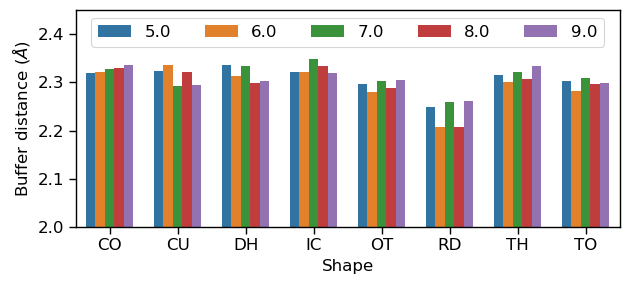

In [174]:
fig, ax = plt.subplots(figsize=(6.5, 3), dpi=dpi)
sns.barplot(data=bufferDF, x='shape', y='DBoxEX', hue='bufferDist', width=0.7, ax=ax)
plt.ylim(bottom=2.0, top=2.45)
plt.xlabel('Shape')
plt.ylabel(r'Buffer distance ($\AA$)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
plt.tight_layout()
plt.savefig('figures/paramTuneEXBufferDBoxBarPlot.png')

Using odd and even number of offset values return slightly different ${D_B}_E$ value. The heaviest impact is observed on the `RD` nanoparticle, with the even number buffer distances returning lower ${D_B}_E$ values. However, the maximum difference is within $\pm0.03$ (about 1% of the ${D_B}_E$ value), which is relatively small.

#### Conclusion

Considering the relatively small impact of the `bufferDist` parameter on the resulted execution duration, domain range, and ${D_B}_E$ values, we will proceed with the default 5.0 Angstroms.

In [10]:
EXDF = readPickle('outputsProdRun/smallPdNPsEX.pickle')
print(EXDF.head(3))
cols = ['DBoxEX', 'rangeLenEX']  # 'lowCIEX', 'upCIEX', 'minLenEX', 'maxLenEX'
EXDF = EXDF[cols]

           DBoxVX  lowCIVX  upCIVX  R2VX  minLenVX  maxLenVX    DBoxEX  \
000051_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.297915   
000052_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.291209   
000061_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.255419   

            lowCIEX    upCIEX      R2EX  minLenEX  maxLenEX     NPname  \
000051_EX  2.241462  2.354367  0.999821 -0.561698 -0.034888  000051_EX   
000052_EX  2.236916  2.345502  0.999834 -0.557332 -0.030523  000052_EX   
000061_EX  2.174934  2.335904  0.999623 -0.560732 -0.033923  000061_EX   

           rangeLenVX  rangeLenEX  
000051_EX         NaN    0.526809  
000052_EX         NaN    0.526809  
000061_EX         NaN    0.526809  


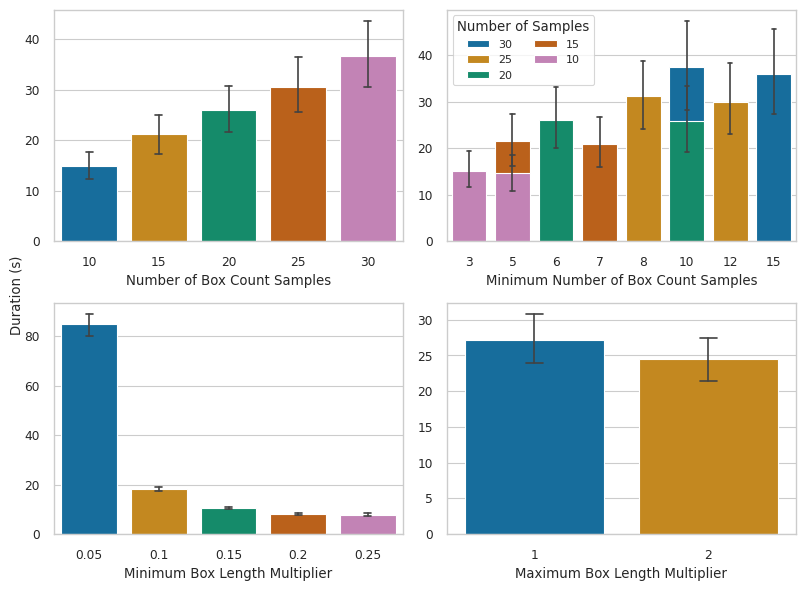

In [233]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=dpi)
g = sns.barplot(data=EXDF, x='numBoxLen', y='duration', errwidth=1.2, capsize=0.1, ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Box Count Samples')
axes[0, 0].set_ylabel('')
g = sns.barplot(data=EXDF, x='minSample', y='duration', hue='numBoxLen', hue_order=[30, 25, 20, 15, 10], dodge=False, errwidth=1.2, capsize=0.1, ax=axes[0, 1])
axes[0, 1].set_xlabel('Minimum Number of Box Count Samples')
axes[0, 1].set_ylabel('')
axes[0, 1].legend(title='Number of Samples', loc='upper left', ncol=2, fontsize='small')
g = sns.barplot(data=EXDF, x='minLenMult', y='duration', errwidth=1.2, capsize=0.1, ax=axes[1, 0])
axes[1, 0].set_xlabel('Minimum Box Length Multiplier')
axes[1, 0].set_ylabel('')
g = sns.barplot(data=EXDF, x='maxLenMult', y='duration', errwidth=1.2, capsize=0.1, ax=axes[1, 1])
axes[1, 1].set_xlabel('Maximum Box Length Multiplier')
axes[1, 1].set_ylabel('')
fig.text(0.0, 0.5, 'Duration (s)', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('figures/paramTuneEXBoxLenDurationBarPlot.png')

The execution time is directly proportional with the total number of box count samples. 

The graph of minimum number of box count sample should be interpreted by taking the total number of box count samples into account, as the proportion of minimum box count sample is maintained at around 30% and 50%. For example, when a total of 10 box count samples are used, setting the minimum sample number to 3 (30% retention) results in longer execution duration compared to 5 (50% retention). This is intuitive as a lower minimum means more iterations of box count sample removal are allowed.

Extending the maximum box lengths does not have significant impact on the execution duration, but using smaller boxes significantly increases run time. 

In [263]:
# Add a column for combinations of box length multipliers
EXDF['lenMult'] = EXDF.apply(lambda f: (f['minLenMult'], f['maxLenMult']), axis=1)
EXDF.sort_values(by=['maxLenMult', 'minLenMult'], inplace=True)
EXDF.head(3)

,shape,DBoxEX,rangeLenEX,minSample,numBoxLen,minLenMult,maxLenMult,duration,lenMult
CO_0.05_1_10_3_EX,CO,2.310380,0.301030,3,10,0.05,1,49.659136,"(0.05, 1)"
CO_0.05_1_10_5_EX,CO,2.202646,0.592076,5,10,0.05,1,48.502381,"(0.05, 1)"
CO_0.05_1_15_5_EX,CO,2.281610,0.381853,5,15,0.05,1,75.209924,"(0.05, 1)"


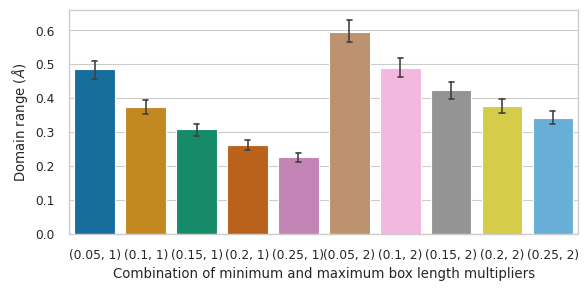

In [272]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=dpi)
sns.barplot(data=EXDF, x='lenMult', y='rangeLenEX', errwidth=1.2, capsize=0.1, ax=ax)
plt.xlabel('Combination of minimum and maximum box length multipliers')
plt.ylabel(r'Domain range ($\AA$)')
plt.tight_layout()
plt.savefig('figures/paramTuneEXBoxLenComboDomainBarPlot.png')

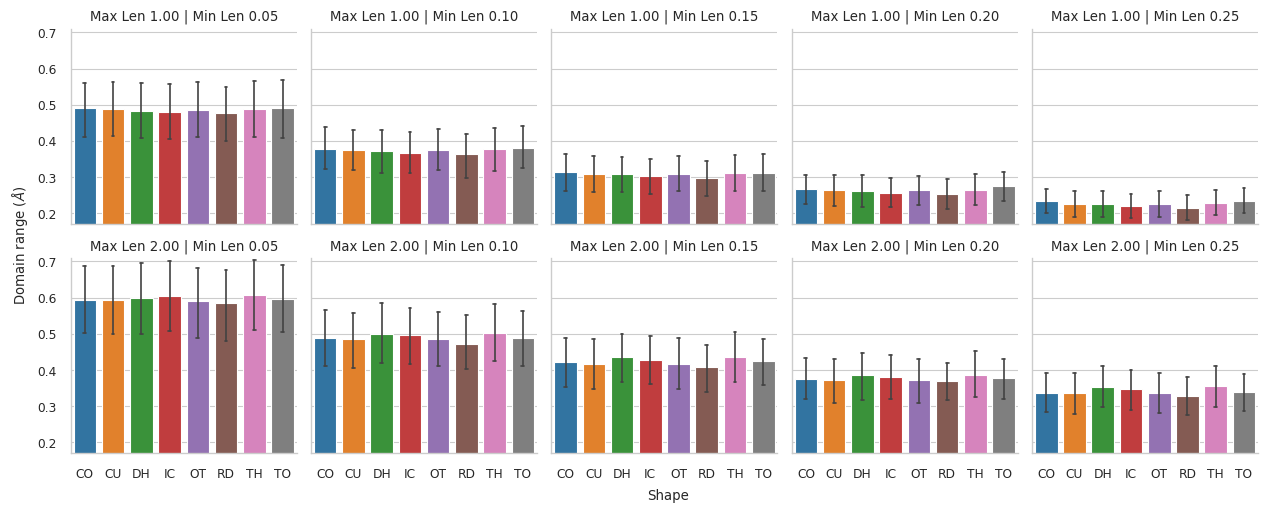

In [269]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    g = sns.FacetGrid(EXDF, col='minLenMult', row='maxLenMult', sharex=True, sharey=True, height=2.5, aspect=1)
    g.map_dataframe(sns.barplot, x='shape', y='rangeLenEX', palette='tab10', errwidth=1.2, capsize=0.1)
    g.set(ylim=(0.17, 0.71))
    g.set_axis_labels('', r'')
    g.set_titles(row_template='Max Len {row_name:.2f}', col_template='Min Len {col_name:.2f}')
    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.figure.text(0.5, 0.0, 'Shape', va='center')
    g.figure.text(-0.01, 0.5, r'Domain range ($\AA$)', va='center', rotation='vertical')
    g.tight_layout()
    g.savefig('figures/paramTuneEXBoxLenShapeDomainBarPlot.png')

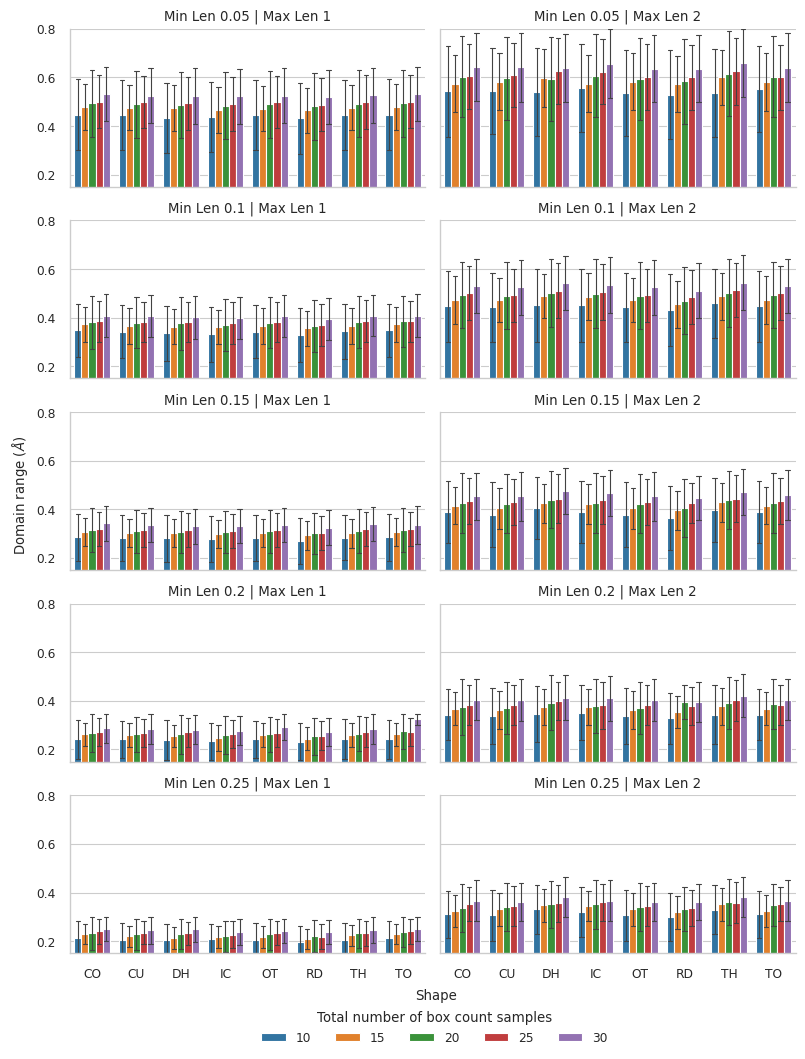

In [284]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    g = sns.FacetGrid(EXDF, row='minLenMult', col='maxLenMult', sharex=True, sharey=True, height=2, aspect=2)
    g.map_dataframe(sns.barplot, x='shape', y='rangeLenEX', hue='numBoxLen', palette='tab10', errwidth=0.8, capsize=0.1)
    g.set(ylim=(0.15, 0.8))
    g.set_axis_labels('', '')
    g.set_titles(col_template='Max Len {col_name}', row_template='Min Len {row_name}')
    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.figure.text(0.34, 0.0, 'Shape', va='center')
    g.figure.text(-0.01, 0.5, r'Domain range ($\AA$)', va='center', rotation='vertical')
    g.add_legend(title='Total number of box count samples', loc='lower center', bbox_to_anchor=(0.357, -0.06), ncol=5)
    g.tight_layout()
    g.savefig('figures/paramTuneEXBoxLenShapeNumBoxLenDomainBarPlot.png')

An obvious trend is observed: using smaller minimum box length and larger maximum box length results in wider domain ranges. The impact of nanoparticle shapes on the domain range is negligible. Using larger total number of box count samples also results in wider domain ranges.

<a id='case-study'></a>
## Case Study: Simulated Palladium Nanoparticles

Here we compute the box-counting dimensions $D_B$ of a set of simulated palladium nanoparticles and analyse the results.

In [10]:
EXDF = readPickle('outputsProdRun/smallPdNPsEX.pickle')
print(EXDF.head(3))
cols = ['DBoxEX', 'rangeLenEX']  # 'lowCIEX', 'upCIEX', 'minLenEX', 'maxLenEX'
EXDF = EXDF[cols]

           DBoxVX  lowCIVX  upCIVX  R2VX  minLenVX  maxLenVX    DBoxEX  \
000051_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.297915   
000052_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.291209   
000061_EX     NaN      NaN     NaN   NaN       NaN       NaN  2.255419   

            lowCIEX    upCIEX      R2EX  minLenEX  maxLenEX     NPname  \
000051_EX  2.241462  2.354367  0.999821 -0.561698 -0.034888  000051_EX   
000052_EX  2.236916  2.345502  0.999834 -0.557332 -0.030523  000052_EX   
000061_EX  2.174934  2.335904  0.999623 -0.560732 -0.033923  000061_EX   

           rangeLenVX  rangeLenEX  
000051_EX         NaN    0.526809  
000052_EX         NaN    0.526809  
000061_EX         NaN    0.526809  


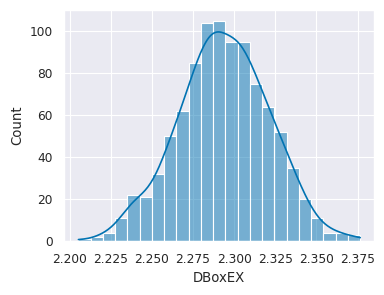

In [15]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.histplot(data=EXDF, x='DBoxEX', kde=True, ax=ax)

In [22]:
VXfullDF = readPickle('outputsProdRun/smallPdNPsVXfull.pickle')
print(VXfullDF.head(3))
cols = ['DBoxVX', 'R2VX', 'minLenVX', 'maxLenVX', 'rangeLenVX']  # 'lowCIEX', 'upCIEX'
VXfullDF = VXfullDF[cols]

             DBoxVX   lowCIVX    upCIVX      R2VX  minLenVX  maxLenVX  DBoxEX  \
000051_VX  1.939675  1.707594  2.171755  0.982393  -2.70927  -0.30103     NaN   
000052_VX  1.934158  1.697756  2.170559  0.981641  -2.70927  -0.30103     NaN   
000061_VX  1.930508  1.705863  2.155152  0.983331  -2.70927  -0.30103     NaN   

           lowCIEX  upCIEX  R2EX  minLenEX  maxLenEX     NPname  rangeLenVX  \
000051_VX      NaN     NaN   NaN       NaN       NaN  000051_VX     2.40824   
000052_VX      NaN     NaN   NaN       NaN       NaN  000052_VX     2.40824   
000061_VX      NaN     NaN   NaN       NaN       NaN  000061_VX     2.40824   

           rangeLenEX  
000051_VX         NaN  
000052_VX         NaN  
000061_VX         NaN  


In [23]:
# Verify that the domain range is fixed since no sample removal is allowed
VXfullDF['rangeLenVX'].value_counts()

rangeLenVX
2.40824    957
Name: count, dtype: int64

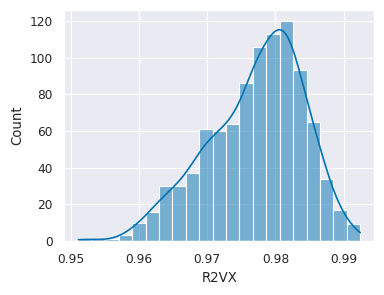

In [24]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.histplot(data=VXfullDF, x='R2VX', kde=True, ax=ax)

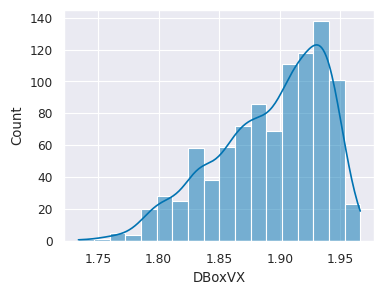

In [29]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.histplot(data=VXfullDF, x='DBoxVX', kde=True, ax=ax)

In [25]:
VXDF = readPickle('outputsProdRun/smallPdNPsVX.pickle')
print(VXDF.head(3))
cols = ['DBoxVX', 'R2VX', 'minLenVX', 'maxLenVX', 'rangeLenVX']  # 'lowCIEX', 'upCIEX'
VXDF = VXDF[cols]

             DBoxVX   lowCIVX    upCIVX      R2VX  minLenVX  maxLenVX  DBoxEX  \
000051_VX  2.219676  2.036856  2.402496  0.996492  -2.70927  -1.20412     NaN   
000052_VX  2.218518  2.018052  2.418984  0.995781  -2.70927  -1.20412     NaN   
000061_VX  2.200453  2.054640  2.346267  0.997727  -2.70927  -1.20412     NaN   

           lowCIEX  upCIEX  R2EX  minLenEX  maxLenEX     NPname  rangeLenVX  \
000051_VX      NaN     NaN   NaN       NaN       NaN  000051_VX     1.50515   
000052_VX      NaN     NaN   NaN       NaN       NaN  000052_VX     1.50515   
000061_VX      NaN     NaN   NaN       NaN       NaN  000061_VX     1.50515   

           rangeLenEX  
000051_VX         NaN  
000052_VX         NaN  
000061_VX         NaN  


In [26]:
VXDF['rangeLenVX'].value_counts()

rangeLenVX
1.50515    957
Name: count, dtype: int64

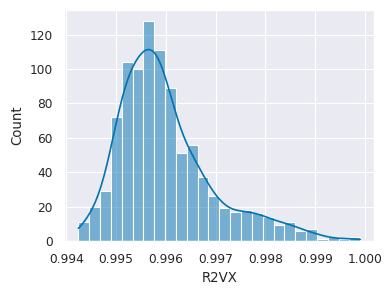

In [27]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.histplot(data=VXDF, x='R2VX', kde=True, ax=ax)

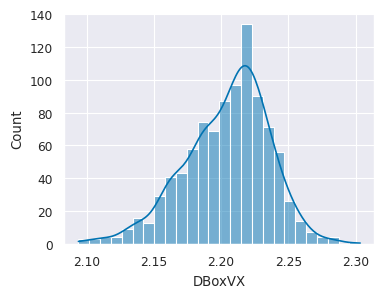

In [28]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=dpi)
g = sns.histplot(data=VXDF, x='DBoxVX', kde=True, ax=ax)